ANALISIS DE DATOS SOBRE PREGUNTAS

Importación de datos y librerías 

In [50]:
import csv
import pandas as pd
import numpy as np
import matplotlib as plt
pd.set_option('display.max_colwidth', -1)
Data=pd.read_csv('//Users/irenearabiourrutia/Downloads/doc/tfm1/DataPregunta.csv')

In [51]:
len(Data)

36671

Tipos de variables

In [52]:
Data.dtypes

Fecha               object
NumeroRespuestas    object
NumeroVisitas       object
Tema                object
TextoPregunta       object
TituloPregunta      object
dtype: object

In [53]:
Data.head()

,Fecha,NumeroRespuestas,NumeroVisitas,Tema,TextoPregunta,TituloPregunta
0,- hace 2 semanas,1,156,Dudas sobre mi hipoteca,"Buenos días.,\r\n,En el 2007 contratamos una hipoteca joven con bankia. Hipoteca que aún mantenemos. A dia de hoy quiero comprar otra vivienda pero quiero acogerme a las ventajas que me ofrece Kutxabank. ,\r\n,Mis dudas son ¿cómo puedo saber si la hipoteca de bankia me exige mantener la nómina con ellos? ¿podrían subir el diferencia si me llevo la nómina a otro banco? ¿Podría sustituir la nómina por los pagos de un alquiler del piso hipotecado con Bankia?.,\r\n,Muchas gracias.,\r\n,Un salud.",Obligatoriedad de nómina
1,- hace 1 semana,1,214,Foro de préstamos personales,"Buenas tardes, ,\r\n,Compre hace un año un vehículo KIA financiado con Cetelem. Lo quería pagar al contado, pero me subían el precio, porque financiado me hacían un dto. que me salía más rentable. Sé que hay un plazo mínimo de tiempo para poder devolver el ptmo. anticipadamente, sin concurrir en tener que devolver el dto. que me aplicaron por financiarlo. Pero no sé exactamente qué plazo es el que debo de tener ya pagado. Ahora mismo he pagado ya 12 cuotas. ,\r\n, ,\r\n,¿ Alguien lo sabe ?,\r\n, ,\r\n,MUCHAS GRACIAS",consulta plazo devolucion
2,- hace 1 semana,0,15,"Cambio hipoteca: subrogación, cancelación, revisión, novación","Buenos días,\r\n,He comenzado los tramites con una entidad que me ha confirmado por escrito la autorización de mi hipoteca a falta de entrega de nota simple y tasación.,\r\n,Mi pregunta es ¿puedo cancelar la hipoteca actual con la nueva hipoteca siendo entidades distintas?,\r\n,Es decir en lugar de surrogar que tiene un coste hago una hipoteca nueva que me sirve para cancelar la actual y solo tendría que pagar por la tasación y nota simple.,\r\n,¿Sería correcto?",Cancelar una hipoteca con otra
3,- hace 1 semana,1,23,Foro de cuenta de ahorro,"Abrí una cuenta en Kutxa Banc, y hace unos meses, saqué todo el dinero ya que me cobraban comisiones de mantenimiento, comisiones que otras veces ha cobrado pero luego me las han abonado. No tengo deudas, ni créditos, ni hipotecas, no tengo nada con ellos, simplememnte abrí la cuenta por tener una cuenta en otro banco. Ahora me reclaman 70E de gastos por tener la cuenta abierta y sin nada.,\r\n,La pregunta es: si sigo con la cuenta tal como está, es decir, sin saldo. ¿Me podrían reclamar de alguna forma, estos gastos de mantenimiento?,\r\n, ,\r\n,Yo creo que no, ya que no tengo obligaciones financieras de ningún tipo con ellos.,\r\n, ,\r\n,Gracias.","Cuenta sin saldo, que puede pasar."
4,- hace 2 semanas,1,121,Foro de cuenta corriente,"Hola. He leído en un artículo de Jessica Llavero, en una tabla comparativa de entidades sobre el servicio de transferencia inmediata, que N26 se encuentra adherido pero aún no puede enviar.,\r\n,La cosa es que soy cliente ( cuenta N26 Busisnes e Iban español ) y efectivamente, no permite enviar, pero es que tampoco permite recibir transferencias inmediatas.,\r\n,Es decir, como receptor tampoco sirve en este caso.,\r\n,¿ Se sabe para cuándo tendrán el servicio habilitado al menos como banco receptor ? ,\r\n,Si está adherido al sistema, ¿ no debería al menos permitir recibir transferencias inmediatas ?,\r\n,",N26 y transferencias inmediatas


Como se puede observar en las siguientes líneas, en el campo Tema hay muchas variaciones.

In [54]:
Data['Tema'].unique()

array(['Dudas sobre mi hipoteca', 'Foro de préstamos personales',
       'Cambio hipoteca: subrogación, cancelación, revisión, novación',
       'Foro de cuenta de ahorro', 'Foro de cuenta corriente',
       'Conseguir hipoteca: requisitos, tasación, documentación',
       'Foro de reunificar deudas', 'Info sobre bancos y cajas',
       'Foro de tarjetas de crédito', 'Foro de agencias inmobiliarias',
       'Morosidad, impago de hipoteca, embargo', 'Foro de vender piso',
       'Foro de impuestos y gastos al vender un piso', 'Foro de seguros',
       'Foro de cuenta nómina', 'Foro de préstamos rápidos',
       'Foro de vender un piso heredado',
       'Impuestos y deducción fiscal,Dudas sobre mi hipoteca',
       'Foro de portales inmobiliarios',
       'Foro de préstamos personales,Foro de cuenta corriente',
       'Foro de mini créditos', 'Foro de planes de pensiones',
       'Foro de cuenta corriente,Energía',
       'Foro pisos de banco,Conseguir hipoteca: requisitos, tasación, doc

En las siguientes lineas se crea el campo TemaGeneral, que recoge el tema de una forma más general que el campo Tema.

In [55]:
Data.loc[Data['Tema'].str.contains("Préstamo"),'TemaGeneral'] = 'Prestamos'
Data.loc[Data['Tema'].str.contains("préstamo"),'TemaGeneral'] = 'Prestamos'
Data.loc[Data['Tema'].str.contains("cuenta"),'TemaGeneral'] = 'Cuentas'
Data.loc[Data['Tema'].str.contains("Cuenta"),'TemaGeneral'] = 'Cuentas'
Data.loc[Data['Tema'].str.contains("Hipoteca"),'TemaGeneral'] = 'Hipotecas'
Data.loc[Data['Tema'].str.contains("hipoteca"),'TemaGeneral'] = 'Hipotecas'
Data.loc[Data['Tema'].str.contains("Depósito"),'TemaGeneral'] = 'Depositos'
Data.loc[Data['Tema'].str.contains("depósito"),'TemaGeneral'] = 'Depositos'
Data.loc[Data['Tema'].str.contains("Tarjeta"),'TemaGeneral'] = 'Tarjetas'
Data.loc[Data['Tema'].str.contains("tarjeta"),'TemaGeneral'] = 'Tarjetas'
Data.loc[Data['Tema'].str.contains("inmobiliari"),'TemaGeneral'] = 'Inmobiliarias'
Data.loc[Data['Tema'].str.contains("Inmobiliari"),'TemaGeneral'] = 'Inmobiliarias'
Data.loc[Data['Tema'].str.contains("Vender piso"),'TemaGeneral'] = 'VenderPisos'
Data.loc[Data['Tema'].str.contains("Vender un piso"),'TemaGeneral'] = 'VenderPisos'
Data.loc[Data['Tema'].str.contains("vender piso"),'TemaGeneral'] = 'VenderPisos'
Data.loc[Data['Tema'].str.contains("vender un piso"),'TemaGeneral'] = 'VenderPisos'
Data.loc[Data['Tema'].str.contains("Deudas"),'TemaGeneral'] = 'Deudas'
Data.loc[Data['Tema'].str.contains("deudas"),'TemaGeneral'] = 'Deudas'
Data.loc[Data['Tema'].str.contains("bancos y cajas"),'TemaGeneral'] = 'BancosyCajas'
Data.loc[Data['Tema'].str.contains("seguro"),'TemaGeneral'] = 'Seguros'
Data.loc[Data['Tema'].str.contains("Seguro"),'TemaGeneral'] = 'Seguros'
Data.loc[Data['Tema'].str.contains("Pensi"),'TemaGeneral'] = 'Pensiones'
Data.loc[Data['Tema'].str.contains("pensi"),'TemaGeneral'] = 'Pensiones'
Data.loc[Data['Tema'].str.contains("Móvil"),'TemaGeneral'] = 'TarifaMovil'
Data.loc[Data['Tema'].str.contains("móvil"),'TemaGeneral'] = 'TarifaMovil'
Data.loc[Data['Tema'].str.contains("Energ"),'TemaGeneral'] = 'Energia'
Data.loc[Data['Tema'].str.contains("energ"),'TemaGeneral'] = 'Energia'
Data.loc[Data['Tema'].str.contains("Pisos de banco"),'TemaGeneral'] = 'PisosBanco'
Data.loc[Data['Tema'].str.contains("pisos de banco"),'TemaGeneral'] = 'PisosBanco'
Data.loc[Data['Tema'].str.contains("Impuestos y deducción fiscal"),'TemaGeneral'] = 'DeduccionFiscal'
Data.loc[Data['Tema'].str.contains("proptech"),'TemaGeneral'] = 'Proptech'
Data.loc[Data['Tema'].str.contains("Luz"),'TemaGeneral'] = 'Luz'
Data.loc[Data['Tema'].str.contains("luz"),'TemaGeneral'] = 'Luz'
Data.loc[Data['Tema'].str.contains("acci"),'TemaGeneral'] = 'Acciones'
Data.loc[Data['Tema'].str.contains("Acci"),'TemaGeneral'] = 'Acciones'
Data.loc[Data['Tema'].str.contains("bono"),'TemaGeneral'] = 'InvertirBonos'
Data.loc[Data['Tema'].str.contains("Bono"),'TemaGeneral'] = 'InvertirBonos'
Data.loc[Data['Tema'].str.contains("Foro de solvencia"),'TemaGeneral'] = 'Solvencia'
Data.loc[Data['Tema'].str.contains("Foro solvencia de bancos"),'TemaGeneral'] = 'SolvenciaBancos'
Data.loc[Data['Tema'].str.contains("ini créditos"),'TemaGeneral'] = 'MiniCreditos'
Data.loc[Data['Tema'].str.contains("ondos de inversión"),'TemaGeneral'] = 'FondosDeInversion'
Data.loc[Data['Tema'].str.contains("Solvencia de los bancos"),'TemaGeneral'] = 'SolvenciaBancos'
Data.loc[Data['Tema'].str.contains("agarés"),'TemaGeneral'] = 'Pagarés'
Data.loc[Data['Tema'].str.contains("Preferent"),'TemaGeneral'] = 'PreferentesySubordinadas'
Data.loc[Data['Tema'].str.contains("Subordina"),'TemaGeneral'] = 'PreferentesySubordinadas'
Data.loc[Data['Tema'].str.contains("preferent"),'TemaGeneral'] = 'PreferentesySubordinadas'
Data.loc[Data['Tema'].str.contains("subordina"),'TemaGeneral'] = 'PreferentesySubordinadas'
Data.loc[Data['Tema'].str.contains("Forex"),'TemaGeneral'] = 'Forex'
Data.loc[Data['Tema'].str.contains("forex"),'TemaGeneral'] = 'Forex'
Data.loc[Data['Tema'].str.contains("Mercados"),'TemaGeneral'] = 'Mercados'
Data.loc[Data['Tema'].str.contains("notario"),'TemaGeneral'] = 'ConsultaNotario'
Data.loc[Data['Tema'].str.contains("Proptech"),'TemaGeneral'] = 'Proptech'

In [56]:
Data.loc[Data['Tema'].str.contains("impago de hipoteca"),'Tema'] = 'Morosidad, impago de hipoteca, embargo'
Data.loc[Data['Tema'].str.contains("Cláusula suelo"),'Tema'] = 'Cláusula suelo'

In [57]:
Data[Data['TemaGeneral']==''].count()

Fecha               0
NumeroRespuestas    0
NumeroVisitas       0
Tema                0
TextoPregunta       0
TituloPregunta      0
TemaGeneral         0
dtype: int64

Se crea el grafico de número de preguntas por tema

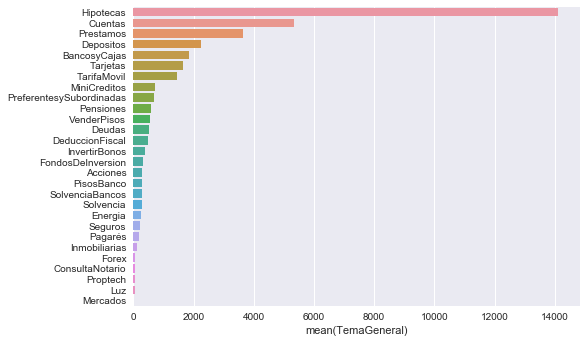

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
sns.barplot(y=Data.TemaGeneral.value_counts().index, x=Data.TemaGeneral.value_counts())
plt.show()

Se crea el campo Año

In [59]:
Data.loc[Data['Fecha'].str.contains("semana"),'Año'] = 2020
Data.loc[Data['Fecha'].str.contains("mes"),'Año'] = 2020
Data.loc[Data['Fecha'].str.contains("hora"),'Año'] = 2020
Data.loc[Data['Fecha'].str.contains("día"),'Año'] = 2020
Data.loc[Data['Fecha'].str.contains("segundo"),'Año'] = 2020
Data.loc[Data['Fecha'].str.contains("minuto"),'Año'] = 2020
Data.loc[Data['Fecha'].str.contains("1 año"),'Año'] = 2019
Data.loc[Data['Fecha'].str.contains("2 año"),'Año'] = 2018
Data.loc[Data['Fecha'].str.contains("3 año"),'Año'] = 2017
Data.loc[Data['Fecha'].str.contains("4 año"),'Año'] = 2016
Data.loc[Data['Fecha'].str.contains("5 año"),'Año'] = 2015
Data.loc[Data['Fecha'].str.contains("6 año"),'Año'] = 2014
Data.loc[Data['Fecha'].str.contains("7 año"),'Año'] = 2013
Data.loc[Data['Fecha'].str.contains("8 año"),'Año'] = 2012
Data.loc[Data['Fecha'].str.contains("9 año"),'Año'] = 2011

Se extrae de los campos NumeroVisitas y NumeroRespuestas el número.

In [60]:
Data['NumeroVisitas']=Data.NumeroVisitas.str.extract('(\d+)')
Data['NumeroRespuestas']=Data.NumeroRespuestas.str.extract('(\d+)')

/Users/irenearabiourrutia/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  """Entry point for launching an IPython kernel.
/Users/irenearabiourrutia/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  


Se convierte variables numericas

In [61]:
Data['NumeroVisitas']=Data['NumeroVisitas'].astype(object).astype(float)
Data['NumeroRespuestas']=Data['NumeroRespuestas'].astype(object).astype(float)

In [62]:
Data.dtypes

Fecha               object 
NumeroRespuestas    float64
NumeroVisitas       float64
Tema                object 
TextoPregunta       object 
TituloPregunta      object 
TemaGeneral         object 
Año                 float64
dtype: object

Una vez realizados los cambios, se convierte a CSV para poder utilizarlo en Tableau

In [63]:
Data.to_csv('datapregunta.csv')

Se importan las librerias necesarias para el analisis de texto

In [64]:
import nltk
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
stop_words = set(stopwords.words('spanish'))
palabras=['si',"saludos","gracias"]

Se quitan las lineás que tengan NA

In [65]:
Data.dropna(subset=['TextoPregunta'], how='all', inplace=True)

Se crea una funcion para que se anulen las tildes, convierta todo el texto a minúnsculas y elimine los stop_words, números y carácteres especiales.

In [66]:
def limpieza(texto):
    texto=texto.replace("í", "i")
    texto=texto.replace("ó", "o")
    texto=texto.replace("á", "a")
    texto=texto.replace("é", "e")
    texto=texto.replace("ú", "u")  
    texto=re.sub(r'[^\w\s]',' ',texto)
    texto=re.sub(r'[0-9]+',' ',texto)
    texto=texto.strip().lower()
    texto=word_tokenize(texto)
    texto= [w for w in texto if not w in stop_words]
    texto= [w for w in texto if not w in palabras]
   
    return  " ".join(texto)

In [67]:
Data['PreguntaLimpio'] = Data.apply(lambda x: limpieza(x['TextoPregunta']), axis=1)

In [68]:
Data['TituloPreguntaLimpio'] = Data.apply(lambda x: limpieza(x['TituloPregunta']), axis=1)

In [69]:
Data['PreguntaLimpio']=Data.PreguntaLimpio.str.replace('saber si','')
Data['PreguntaLimpio']=Data.PreguntaLimpio.str.replace('muchas gracias','')
Data['PreguntaLimpio']=Data.PreguntaLimpio.str.replace('gracias antemano','')
Data['PreguntaLimpio']=Data.PreguntaLimpio.str.replace('un saludo','')
Data['PreguntaLimpio']=Data.PreguntaLimpio.str.replace('hola','')
Data['PreguntaLimpio']=Data.PreguntaLimpio.str.replace('buenas tardes','')
Data['PreguntaLimpio']=Data.PreguntaLimpio.str.replace('buenos dias','')
Data['PreguntaLimpio']=Data.PreguntaLimpio.str.replace('alguien puede','')
Data['PreguntaLimpio']=Data.PreguntaLimpio.str.replace('puedo hacer','')
Data['PreguntaLimpio']=Data.PreguntaLimpio.str.replace('pregunta si','')
Data['PreguntaLimpio']=Data.PreguntaLimpio.str.replace('quisiera saber','')
Data['PreguntaLimpio']=Data.PreguntaLimpio.str.replace('queria saber','')
Data['PreguntaLimpio']=Data.PreguntaLimpio.str.replace('gustaria saber','')
Data['PreguntaLimpio']=Data.PreguntaLimpio.str.replace('quiero saber','')

HIPOTECAS

In [70]:
PreguntaHipotecas=Data[Data['TemaGeneral']=='Hipotecas']

In [71]:
PreguntaHipotecas.head()

,Fecha,NumeroRespuestas,NumeroVisitas,Tema,TextoPregunta,TituloPregunta,TemaGeneral,Año,PreguntaLimpio,TituloPreguntaLimpio
0,- hace 2 semanas,1.0,156.0,Dudas sobre mi hipoteca,"Buenos días.,\r\n,En el 2007 contratamos una hipoteca joven con bankia. Hipoteca que aún mantenemos. A dia de hoy quiero comprar otra vivienda pero quiero acogerme a las ventajas que me ofrece Kutxabank. ,\r\n,Mis dudas son ¿cómo puedo saber si la hipoteca de bankia me exige mantener la nómina con ellos? ¿podrían subir el diferencia si me llevo la nómina a otro banco? ¿Podría sustituir la nómina por los pagos de un alquiler del piso hipotecado con Bankia?.,\r\n,Muchas gracias.,\r\n,Un salud.",Obligatoriedad de nómina,Hipotecas,2020.0,contratamos hipoteca joven bankia hipoteca aun mantenemos dia hoy quiero comprar vivienda quiero acogerme ventajas ofrece kutxabank dudas puedo saber hipoteca bankia exige mantener nomina podrian subir diferencia llevo nomina banco podria sustituir nomina pagos alquiler piso hipotecado bankia muchas salud,obligatoriedad nomina
2,- hace 1 semana,0.0,15.0,"Cambio hipoteca: subrogación, cancelación, revisión, novación","Buenos días,\r\n,He comenzado los tramites con una entidad que me ha confirmado por escrito la autorización de mi hipoteca a falta de entrega de nota simple y tasación.,\r\n,Mi pregunta es ¿puedo cancelar la hipoteca actual con la nueva hipoteca siendo entidades distintas?,\r\n,Es decir en lugar de surrogar que tiene un coste hago una hipoteca nueva que me sirve para cancelar la actual y solo tendría que pagar por la tasación y nota simple.,\r\n,¿Sería correcto?",Cancelar una hipoteca con otra,Hipotecas,2020.0,comenzado tramites entidad confirmado escrito autorizacion hipoteca falta entrega nota simple tasacion pregunta puedo cancelar hipoteca actual nueva hipoteca siendo entidades distintas decir lugar surrogar coste hago hipoteca nueva sirve cancelar actual solo tendria pagar tasacion nota simple seria correcto,cancelar hipoteca
5,- hace 3 semanas,0.0,252.0,"Conseguir hipoteca: requisitos, tasación, documentación","Esto es mas a modo desahogo... Tengo 30 años, pocos ahorros, y la nueva ley hipotecaria no se hast que punto beneficia. Me encuentro bancos que estan poniendo como requisito que la casa tenga un valor de compraventa superior a 100.000€, y la mía son 99.000€, por lo que me lo tiran hacia atrás en varios por eso. Luego los que dicen que dan el 80 de la tasación, no lo es, porque en realidad es eso o el 90 de la compra, siempre siendo el valor menor, y se acogen a que eso es por la nueva ley.... Yo estoy un poco cansada la verdad, porque se me agotan ya las fuerzas, te encuentras pocas diferencias al respecto y se te van las ganas. Los que mejores condiciones dan son los que no financian si compras por debajo de 100.000€",Esto es imposible...,Hipotecas,2020.0,mas modo desahogo años pocos ahorros nueva ley hipotecaria hast punto beneficia encuentro bancos estan poniendo requisito casa valor compraventa superior mia tiran hacia atras varios luego dicen dan tasacion realidad compra siempre siendo valor menor acogen nueva ley cansada verdad agotan fuerzas encuentras pocas diferencias respecto van ganas mejores condiciones dan financian compras debajo,imposible
6,- hace 4 semanas,3.0,293.0,"Cambio hipoteca: subrogación, cancelación, revisión, novación","Buenas noches!! En el 2005 nos concedieron un préstamo hipotecario de 226000 euros. Nos pedían dos avales y un titular aparte de mi marido y yo. Total 3 titulares en el préstamo hipotecario. Mi pregunta es la siguiente: se podría quitar ese tercer titular, que gastos me supondría si ha día de hoy me queda por pagar 140000 euros. Gracias",Quitar titular del préstamo hipotecario,Hipotecas,2020.0,buenas noches concedieron prestamo hipotecario euros pedian dos avales titular aparte marido total titulares prestamo hipotecario guiente podria quitar tercer titular gastos supondria dia hoy queda pagar euros,quitar titular prestamo hipotecario
8,- hace 4 semanas,6.

Se define la funcion que calcula los n-gramas mas frecuentes.

In [72]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.util import ngrams
def get_top_ngram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) 
                  for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:20]

In [73]:
get_top_ngram(PreguntaHipotecas['TituloPreguntaLimpio'],2)

[('clausula suelo', 1002),
 ('dacion pago', 365),
 ('suelo hipoteca', 254),
 ('gastos hipoteca', 235),
 ('pagar hipoteca', 201),
 ('irph cajas', 199),
 ('subrogacion hipoteca', 181),
 ('hipoteca fija', 164),
 ('cancelacion hipoteca', 158),
 ('prestamo hipotecario', 154),
 ('puedo reclamar', 145),
 ('puedo hacer', 144),
 ('extincion condominio', 135),
 ('pueden embargar', 109),
 ('puedo pagar', 109),
 ('tipo interes', 107),
 ('pedir hipoteca', 106),
 ('hipoteca irph', 102),
 ('hipoteca banco', 101),
 ('interes fijo', 100)]

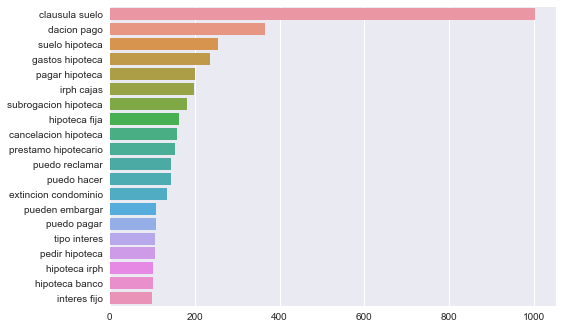

In [74]:
sns.set_style('darkgrid')
top_tri_grams=get_top_ngram(PreguntaHipotecas['TituloPreguntaLimpio'],n=2)
x,y=map(list,zip(*top_tri_grams))
sns.barplot(x=y,y=x)
plt.show()

In [76]:
suelo=PreguntaHipotecas[PreguntaHipotecas['PreguntaLimpio'].str.contains("clausula suelo")] 

In [77]:
suelo

,Fecha,NumeroRespuestas,NumeroVisitas,Tema,TextoPregunta,TituloPregunta,TemaGeneral,Año,PreguntaLimpio,TituloPreguntaLimpio
274,- hace 1 semana,0.0,24.0,"Cambio hipoteca: subrogación, cancelación, revisión, novación","Buenas, en el 2015 me hicieron una novación de la hipoteca porque por error de ellos, me cobraban el 0.75 de diferencial cuando en la escritura ponía el 1. Con lo cual, todos esos intereses los tuve que pagar yo. Pero en la novación, me pusieron de diferencial el 2.5. ¿es legal o es una cláusula suelo disfrazada?,\r\n,Gracias",novación con diferencial alto,Hipotecas,2020.0,buenas hicieron novacion hipoteca error cobraban diferencial escritura ponia intereses pagar novacion pusieron diferencial legal clausula suelo disfrazada,novacion diferencial alto
444,- hace 2 meses,1.0,141.0,Dudas sobre mi hipoteca,"nosotros pactamos quitarnos la clausula suelo a cambio de tipo fijo nos quedaban 14 Años de hipoteca y nos parecio bien, esto anula los productos vinculados? pues ya no pueden modificar el tipo fijo pactado, o estamos equivocados?",pacto clausula suelo,Hipotecas,2020.0,pactamos quitarnos clausula suelo cambio tipo fijo quedaban años hipoteca parecio bien anula productos vinculados pues pueden modificar tipo fijo pactado equivocados,pacto clausula suelo
502,- hace 3 meses,0.0,145.0,Cláusula suelo,Hola tengo hipoteca f hipoteca firmada desde el año 2010 puse reclamación y ganamos la cláusula suelo en el 2014 tuvo que hacer una novación pedir un préstamo personal cuando pedir préstamo personal también toque la hipoteca sin yo saber la verdad donde me pusieron tipo de interes de un 3% puedo reclamar algo me anularon la cláusula suelo apartir del año 2014 pero me pusieron ese interés nuevo yo demande en el año 2017 y me devolvieron del 2010 al 2014,"Interés del 3% en la hipoteca, ¿puedo reclamar?",Hipotecas,2020.0,hipoteca f hipoteca firmada año puse reclamacion ganamos clausula suelo hacer novacion pedir prestamo personal pedir prestamo personal tambien toque hipoteca saber verdad pusieron tipo interes puedo reclamar anularon clausula suelo apartir año pusieron interes nuevo demande año devolvieron,interes hipoteca puedo reclamar
529,- hace 2 meses,1.0,144.0,Cláusula suelo,"una pregunta:,\r\n, ,\r\n,Un familiar mio abogado me deposito en septiembre 2018 la reclamacion de la clausula suelo.,\r\n, ,\r\n,Todavia no me han devuelto nada.,\r\n, ,\r\n,Mi pregunta es: que tiempo suele tardar en abonar lo reclamado al banco?,\r\n, ,\r\n,gracias",Que tiempo tarda en pagar el banco la clausula suelo,Hipotecas,2020.0,pregunta familiar mio abogado deposito septiembre reclamacion clausula suelo todavia devuelto pregunta tiempo suele tardar abonar reclamado banco,tiempo tarda pagar banco clausula suelo
571,- hace 2 meses,1.0,168.0,"Cambio hipoteca: subrogación, cancelación, revisión, novación","hola a todos, les cuento mi caso. Tengo una hipoteca desde el 2008, la formalicé con una financiera que se llamaba GMAC. Pues bien, esta financiera vende mi deuda a otra, y así hasta en 4 o 5 ocasiones, la mayoria se pusieron en contacto conmigo para ofrecerme quitarme la hipoteca por una cuantia menor o ofrecerme ofertas por cada quita que hiciera y alguna hice. Pues bien la que penúltima que me gestionaba la hipoteca al pedirles una serie de datos de mi hipoteca como clausula suelo, años que me quedan, cuantia de las quitas etc, me dice que no tienen ningun dato de mi hipoteca y mi sorpresa es que venden otra vez mi deuda a otra financiera. Esta llamada ALPHA CREDIT SOLUTION 1 SARL. La cual no tengo manera de comunicarme con ellos. Quiero quitarme esa hipoteca de encima y no se como podria contactar. He ido a mi banco para ver si podian ayudarme, han pedido un informe de mi hipoteca en donde se supone que deben de estar registradas todas las hipotecas de españa y sale como que no tengo ningun prestamo hipotecario a mi nombre. Por favor saben de alguna empresa o abogado especializado que pueda ayudarme. Agradecería vuestra ayuda.,\r\n,salud

In [ ]:
suelo.to_csv('suelo2022.csv')

TARJETAS

In [78]:
DataTemaTarjetas=Data[Data['TemaGeneral']=='Tarjetas']

In [79]:
len(DataTemaTarjetas)

1638

In [80]:
revolving=DataTemaTarjetas[DataTemaTarjetas['PreguntaLimpio'].str.contains("revolving")] 

In [81]:
len(revolving)

16

In [82]:
fraude=DataTemaTarjetas[DataTemaTarjetas['PreguntaLimpio'].str.contains("fraude")] 

In [83]:
len(fraude)

13

CUENTAS

In [84]:
DataTemaCuentas=Data[Data['TemaGeneral']=='Cuentas']

In [85]:
len(DataTemaCuentas)

5322

In [86]:
get_top_ngram(DataTemaCuentas['TituloPreguntaLimpio'],2)

[('cuenta nomina', 400),
 ('abrir cuenta', 316),
 ('cuenta corriente', 224),
 ('cuenta online', 164),
 ('cuenta naranja', 145),
 ('cancelar cuenta', 144),
 ('cuenta ahorro', 141),
 ('cuenta bancaria', 124),
 ('ing direct', 106),
 ('nomina ing', 97),
 ('online bbva', 88),
 ('mejor cuenta', 82),
 ('cuenta banco', 77),
 ('cerrar cuenta', 74),
 ('cuenta coinc', 71),
 ('naranja ing', 70),
 ('dinero cuenta', 65),
 ('banco popular', 64),
 ('domiciliar nomina', 63),
 ('cuenta ing', 54)]

In [87]:
get_top_ngram(DataTemaCuentas['PreguntaLimpio'],2)

[('abrir cuenta', 809),
 ('cuenta nomina', 590),
 ('cuenta corriente', 457),
 ('cuenta naranja', 331),
 ('cuenta ahorro', 272),
 ('cuenta online', 253),
 ('dinero cuenta', 252),
 ('cuenta bancaria', 246),
 ('domiciliar nomina', 235),
 ('sacar dinero', 234),
 ('cuenta banco', 216),
 ('tener cuenta', 208),
 ('tarjeta debito', 191),
 ('cancelar cuenta', 184),
 ('hace años', 174),
 ('ing direct', 158),
 ('cerrar cuenta', 151),
 ('abri cuenta', 144),
 ('abrirme cuenta', 131),
 ('banco santander', 128)]

In [88]:
CorpusBanco=DataTemaCuentas['PreguntaLimpio'].tolist()

In [89]:
CorpusBanco=",".join(CorpusBanco)

In [90]:
from wordcloud import WordCloud, STOPWORDS

def show_wordcloud(data):
    wordcloud = WordCloud(
        background_color='white',
        max_words=100,
        max_font_size=30,
        scale=3,
        random_state=1)
   
    wordcloud=wordcloud.generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')

    plt.imshow(wordcloud)
    plt.show()

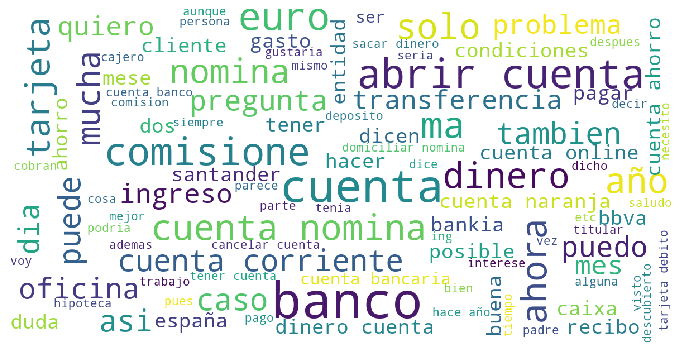

In [91]:
show_wordcloud(CorpusBanco)